# Customer Life Time Value

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, median_absolute_error

In [2]:
file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/OnlineRetail.xlsx"
df = pd.read_excel(file_name, sheet_name='Online Retail')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.tail(4)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [5]:
df.shape

(541909, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


### The minimum amount for 'quantity' is -80995???

* Could be the representation of returned items


* Remove all negative values for 'quantity' and only keep values greater than 0

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [8]:
df = df.loc[df['Quantity'] > 0]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531285 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      531285 non-null object
StockCode      531285 non-null object
Description    530693 non-null object
Quantity       531285 non-null int64
InvoiceDate    531285 non-null datetime64[ns]
UnitPrice      531285 non-null float64
CustomerID     397924 non-null float64
Country        531285 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.5+ MB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,531285.0,10.655262,156.830323,1.00,1.00,3.00,10.00,80995.00
UnitPrice,531285.0,3.857296,41.810047,-11062.06,1.25,2.08,4.13,13541.33
CustomerID,397924.0,15294.315171,1713.169877,12346.00,13969.00,15159.00,16795.00,18287.00


### Adding a 'Sales' Column to the dataset


* Sales is = unitprice * quantity


* A minimum sales value of -11062.06???


* Removing negative values for 'Sales'


* In the engineering of the sales column the column of description having missing value percentage of 0.27% is diminished 

In [11]:
df['Sales'] = df['Quantity'] * df['UnitPrice']

In [12]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,531285.0,10.655262,156.830323,1.00,1.00,3.00,10.00,80995.00
UnitPrice,531285.0,3.857296,41.810047,-11062.06,1.25,2.08,4.13,13541.33
CustomerID,397924.0,15294.315171,1713.169877,12346.00,13969.00,15159.00,16795.00,18287.00
Sales,531285.0,20.035500,270.912370,-11062.06,3.75,9.90,17.70,168469.60


In [14]:
df['Sales'].min()

-11062.06

In [15]:
df = df.loc[df['Sales'] > 0]

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,530104.0,10.542037,155.524124,1.000,1.00,3.00,10.00,80995.00
UnitPrice,530104.0,3.907625,35.915681,0.001,1.25,2.08,4.13,13541.33
CustomerID,397884.0,15294.423453,1713.141560,12346.000,13969.00,15159.00,16795.00,18287.00
Sales,530104.0,20.121871,270.356743,0.001,3.75,9.90,17.70,168469.60


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530104 entries, 0 to 541908
Data columns (total 9 columns):
InvoiceNo      530104 non-null object
StockCode      530104 non-null object
Description    530104 non-null object
Quantity       530104 non-null int64
InvoiceDate    530104 non-null datetime64[ns]
UnitPrice      530104 non-null float64
CustomerID     397884 non-null float64
Country        530104 non-null object
Sales          530104 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 40.4+ MB


In [18]:
df['CustomerID'].count()

397884

In [19]:
df['CustomerID'].nunique()

4338

#### Removing blank customer IDs

In [20]:
df = df[pd.notnull(df['CustomerID'])]

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 9 columns):
InvoiceNo      397884 non-null object
StockCode      397884 non-null object
Description    397884 non-null object
Quantity       397884 non-null int64
InvoiceDate    397884 non-null datetime64[ns]
UnitPrice      397884 non-null float64
CustomerID     397884 non-null float64
Country        397884 non-null object
Sales          397884 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.4+ MB


In [22]:
def miss_val_percentage(df):
    
    total = df.isnull().sum().sort_values(ascending = False)
    
    percentage = round(df.isnull().sum().sort_values(ascending=False) / len(df) * 100, 2)
    
    return pd.concat([total, percentage], axis = 1, keys = ['Total Values Missing', 'Percentage'])

* Almost 25% percent of CustomerID data is missing

In [23]:
miss_val_percentage(df)

,Total Values Missing,Percentage
Sales,0,0.0
Country,0,0.0
CustomerID,0,0.0
UnitPrice,0,0.0
InvoiceDate,0,0.0
Quantity,0,0.0
Description,0,0.0
StockCode,0,0.0
InvoiceNo,0,0.0


## Visualization of Countries

* There are a total of 38 countries


* Makes sense that the United Kingdom would have a significantly higher value count considering this is a UK online retail store


* Creating a new dataframe for visualization excluding the United Kingdom



In [24]:
df['Country'].nunique()

37

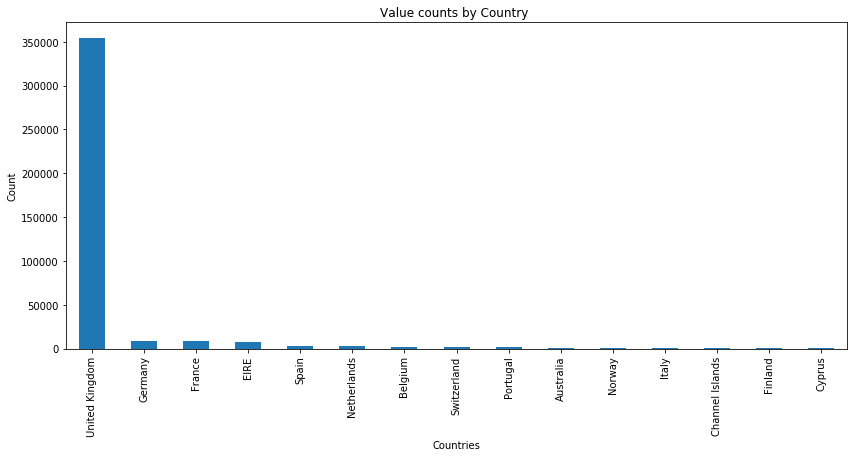

In [25]:
df['Country'].value_counts().head(15).plot.bar(figsize = (14, 6))
plt.rcParams['figure.figsize'] = (14, 6)
plt.style.use('fivethirtyeight')
plt.title('Value counts by Country ', fontsize = 12)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.show()

* Creating a copy of the original dataframe named no_uk_df and removing all the rows that contain the United Kingdom in the country column


* More clearly we can see the relevance of sales of countries Germany, France, and Ireland

In [26]:
no_uk_df = df.copy()

no_uk_df.head(1)

no_uk_df = no_uk_df[no_uk_df.Country != "United Kingdom"]

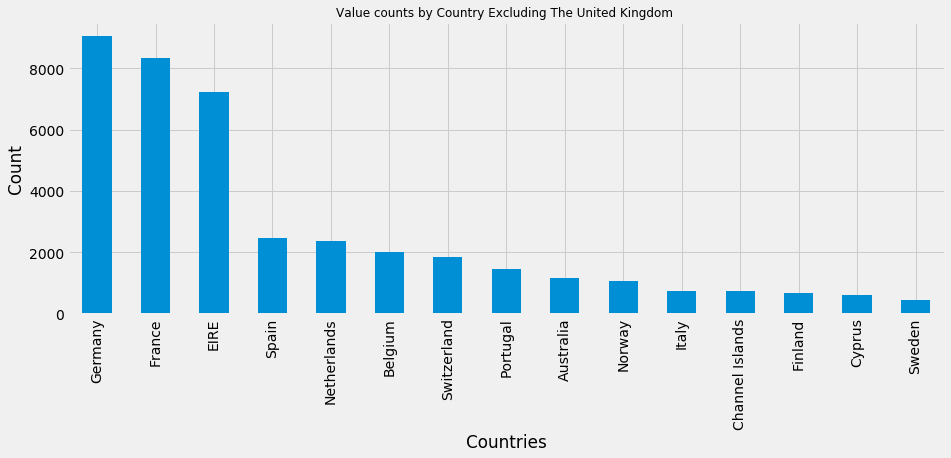

In [27]:
no_uk_df['Country'].value_counts().head(15).plot.bar(figsize = (14, 5))
plt.title('Value counts by Country Excluding The United Kingdom ', fontsize = 12)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.show()

* Most popular stock codes

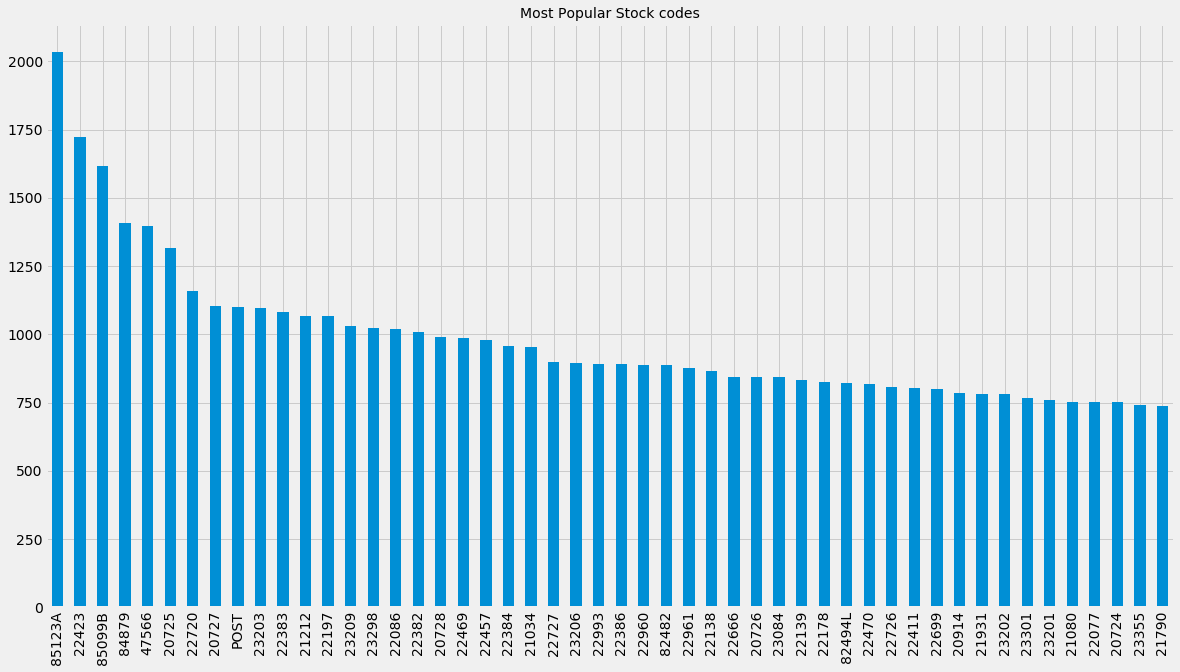

In [28]:
df['StockCode'].value_counts().head(50).plot.bar(figsize = (18, 10))
plt.title('Most Popular Stock codes', fontsize = 14)
plt.show()

## Time Series Analysis


* Viewing the range of dates. Dates range from Decemer 2010 - 2011

In [29]:
print('Date Range: %s to %s' % (df['InvoiceDate'].min(), df['InvoiceDate'].max()))

Date Range: 2010-12-01 08:26:00 to 2011-12-09 12:50:00


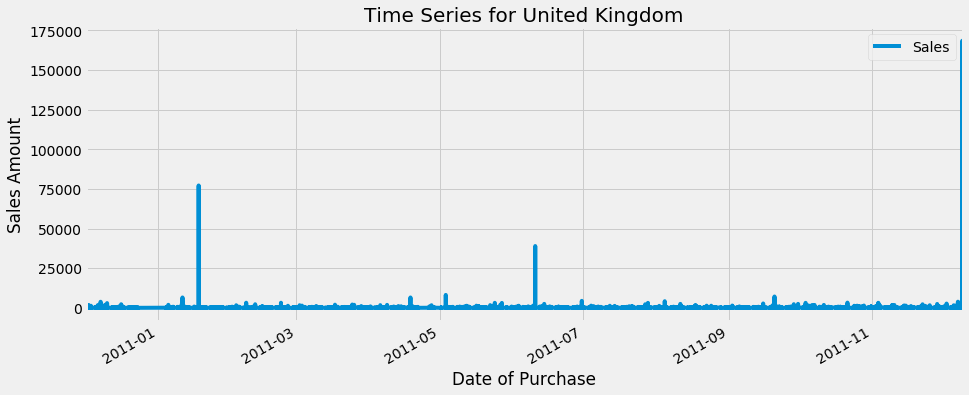

In [30]:
United_Kingdom_time_series = df[df['Country'] == 'United Kingdom']
United_Kingdom_time_series.plot(x = 'InvoiceDate', y = 'Sales')
plt.title('Time Series for United Kingdom', fontsize = 20)
plt.xlabel('Date of Purchase')
plt.ylabel('Sales Amount')
plt.show()

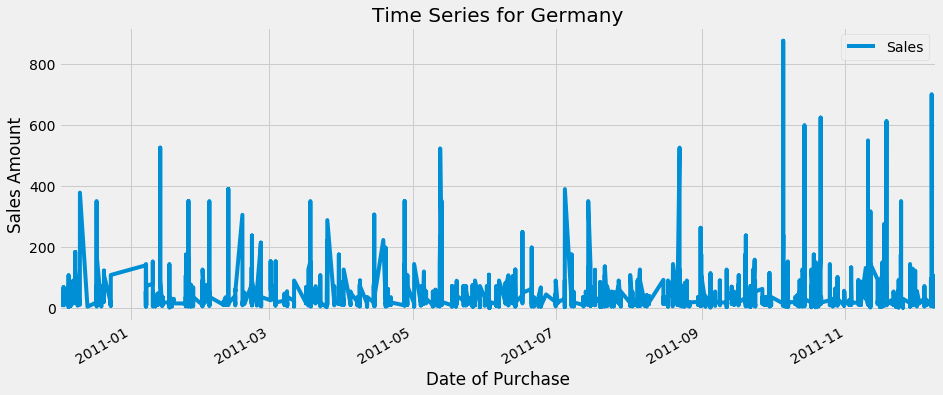

In [31]:
Germany_time_series = df[df['Country'] == 'Germany']
Germany_time_series.plot(x = 'InvoiceDate', y = 'Sales')
plt.title('Time Series for Germany', fontsize = 20)
plt.xlabel('Date of Purchase')
plt.ylabel('Sales Amount')
plt.show()

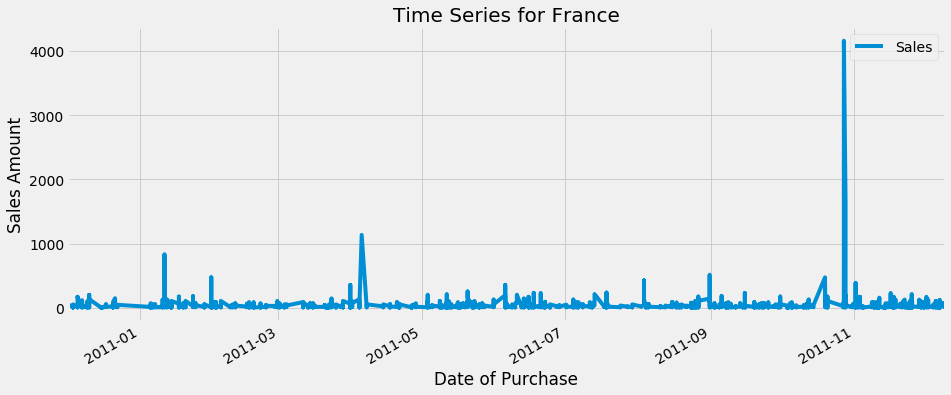

In [32]:
France_time_series = df[df['Country'] == 'France']
France_time_series.plot(x = 'InvoiceDate', y = 'Sales')
plt.title('Time Series for France', fontsize = 20)
plt.xlabel('Date of Purchase')
plt.ylabel('Sales Amount')
plt.show()

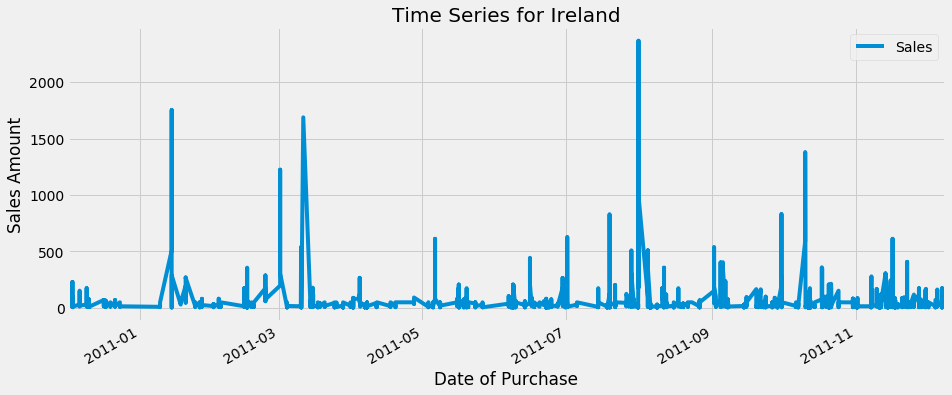

In [33]:
Ireland_time_series = df[df['Country'] == 'EIRE']
Ireland_time_series.plot(x = 'InvoiceDate', y = 'Sales')
plt.title('Time Series for Ireland', fontsize = 20)
plt.xlabel('Date of Purchase')
plt.ylabel('Sales Amount')
plt.show()

### Feautre Engineering & Visualizations


* Creating a sales revenue column


* Taking all transactions occuring before Dec 2011


* Get a orders summary dataset that shows the total in sales made per customer invoice


In [34]:
df = df.loc[df['InvoiceDate'] < '2011-12-01']

In [35]:
orders_df = df.groupby(['CustomerID', 'InvoiceNo']).agg({'Sales': sum,'InvoiceDate': max})

In [36]:
orders_df.head(10)

Sales         InvoiceDate
CustomerID InvoiceNo                              
12346.0    541431     77183.60 2011-01-18 10:01:00
12347.0    537626       711.79 2010-12-07 14:57:00
           542237       475.39 2011-01-26 14:30:00
           549222       636.25 2011-04-07 10:43:00
           556201       382.52 2011-06-09 13:01:00
           562032       584.91 2011-08-02 08:48:00
           573511      1294.32 2011-10-31 12:25:00
12348.0    539318       892.80 2010-12-16 19:09:00
           541998       227.44 2011-01-25 10:42:00
           548955       367.00 2011-04-05 10:47:00

In [37]:
# Create some simple functions we'll be using to create our summary dataframe

def groupby_mean(x):
    return x.mean()

def groupby_count(x):
    return x.count()

def purchase_duration(x):
    return (x.max() - x.min()).days

def avg_frequency(x):
    '''returns the average days between sales'''
    return (x.max() - x.min()).days/x.count()

groupby_mean.__name__ = 'avg'
groupby_count.__name__ = 'count'
purchase_duration.__name__ = 'purchase_duration'
avg_frequency.__name__ = 'purchase_frequency'

summary_df = orders_df.reset_index().groupby('CustomerID').agg({
    'Sales': [min, max, sum, groupby_mean, groupby_count],
    'InvoiceDate': [min, max, purchase_duration, avg_frequency]
})

In [38]:
summary_df.head(10)

Sales                                          \
                 min       max       sum           avg count   
CustomerID                                                     
12346.0     77183.60  77183.60  77183.60  77183.600000   1.0   
12347.0       382.52   1294.32   4085.18    680.863333   6.0   
12348.0       227.44    892.80   1797.24    449.310000   4.0   
12349.0      1757.55   1757.55   1757.55   1757.550000   1.0   
12350.0       334.40    334.40    334.40    334.400000   1.0   
12352.0       120.33    840.30   2506.04    313.255000   8.0   
12353.0        89.00     89.00     89.00     89.000000   1.0   
12354.0      1079.40   1079.40   1079.40   1079.400000   1.0   
12355.0       459.40    459.40    459.40    459.400000   1.0   
12356.0        58.35   2271.62   2811.43    937.143333   3.0   

                   InvoiceDate                                        \
                           min                 max purchase_duration   
CustomerID                                                             
12346.0    2011-01-18 10:01:00 2011-01-18 10:01:00                 0   
12347.0    2010-12-07 14:57:00 2011-10-31 12:25:00               327   
12348.0    2010-12-16 19:09:00 2011-09-25 13:13:00               282   
12349.0    2011-11-21 09:51:00 2011-11-21 09:51:00                 0   
12350.0    2011-02-02 16:01:00 2011-02-02 16:01:00                 0   
12352.0    2011-02-16 12:33:00 2011-11-03 14:37:00               260   
12353.0    2011-05-19 17:47:00 2011-05-19 17:47:00                 0   
12354.0    2011-04-21 13:11:00 2011-04-21 13:11:00                 0   
12355.0    2011-05-09 13:49:00 2011-05-09 13:49:00                 0   
12356.0    2011-01-18 09:50:00 2011-11-17 08:40:00               302   

                               
           purchase_frequency  
CustomerID                     
12346.0              0.000000  
12347.0             54.500000  
12348.0             70.500000  
12349.0              0.000000  
12350.0              0.000000  
12352.0             32.500000  
12353.0              0.000000  
12354.0              0.000000  
12355.0              0.000000  
12356.0            100.666667

In [39]:
summary_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4297 entries, 12346.0 to 18287.0
Data columns (total 9 columns):
(Sales, min)                         4297 non-null float64
(Sales, max)                         4297 non-null float64
(Sales, sum)                         4297 non-null float64
(Sales, avg)                         4297 non-null float64
(Sales, count)                       4297 non-null float64
(InvoiceDate, min)                   4297 non-null datetime64[ns]
(InvoiceDate, max)                   4297 non-null datetime64[ns]
(InvoiceDate, purchase_duration)     4297 non-null int64
(InvoiceDate, purchase_frequency)    4297 non-null float64
dtypes: datetime64[ns](2), float64(6), int64(1)
memory usage: 335.7 KB


In [40]:
summary_df.describe()

Sales                                                          \
                min           max            sum           avg        count   
count   4297.000000   4297.000000    4297.000000   4297.000000  4297.000000   
mean     266.396198    614.040757    1953.273240    400.371478     4.131720   
std     1219.760876   1747.844303    8355.832473   1271.352605     7.412705   
min        0.380000      2.900000       2.900000      2.900000     1.000000   
25%       96.000000    223.360000     304.470000    178.700000     1.000000   
50%      172.250000    366.230000     657.300000    295.056667     2.000000   
75%      310.730000    618.440000    1600.860000    431.674000     4.000000   
max    77183.600000  77183.600000  268478.000000  77183.600000   200.000000   

            InvoiceDate                     
      purchase_duration purchase_frequency  
count       4297.000000        4297.000000  
mean         125.121480          29.446636  
std          128.909181          34.270486  
min            0.000000           0.000000  
25%            0.000000           0.000000  
50%           83.000000          20.125000  
75%          245.000000          48.000000  
max          364.000000         182.000000

* Renaming our columns by combining it with the top row

In [41]:
summary_df.columns = ['_'.join(col).lower() for col in summary_df.columns]

In [42]:
summary_df.head()

,sales_min,sales_max,sales_sum,sales_avg,sales_count,invoicedate_min,invoicedate_max,invoicedate_purchase_duration,invoicedate_purchase_frequency
CustomerID,,,,,,,,,
12346.0,77183.60,77183.60,77183.60,77183.600000,1.0,2011-01-18 10:01:00,2011-01-18 10:01:00,0,0.0
12347.0,382.52,1294.32,4085.18,680.863333,6.0,2010-12-07 14:57:00,2011-10-31 12:25:00,327,54.5
12348.0,227.44,892.80,1797.24,449.310000,4.0,2010-12-16 19:09:00,2011-09-25 13:13:00,282,70.5
12349.0,1757.55,1757.55,1757.55,1757.550000,1.0,2011-11-21 09:51:00,2011-11-21 09:51:00,0,0.0
12350.0,334.40,334.40,334.40,334.400000,1.0,2011-02-02 16:01:00,2011-02-02 16:01:00,0,0.0



* Grouping the sales_counts and then looking at the sales_avg

In [43]:
summary_df.groupby('sales_count').count()['sales_avg'][:5]

sales_count
1.0    1538
2.0     806
3.0     515
4.0     382
5.0     227
Name: sales_avg, dtype: int64

In [44]:
summary_df = summary_df.loc[summary_df['invoicedate_purchase_duration'] > 0]

In [45]:
summary_df.head()

,sales_min,sales_max,sales_sum,sales_avg,sales_count,invoicedate_min,invoicedate_max,invoicedate_purchase_duration,invoicedate_purchase_frequency
CustomerID,,,,,,,,,
12347.0,382.52,1294.32,4085.18,680.863333,6.0,2010-12-07 14:57:00,2011-10-31 12:25:00,327,54.500000
12348.0,227.44,892.80,1797.24,449.310000,4.0,2010-12-16 19:09:00,2011-09-25 13:13:00,282,70.500000
12352.0,120.33,840.30,2506.04,313.255000,8.0,2011-02-16 12:33:00,2011-11-03 14:37:00,260,32.500000
12356.0,58.35,2271.62,2811.43,937.143333,3.0,2011-01-18 09:50:00,2011-11-17 08:40:00,302,100.666667
12359.0,547.50,2876.85,6372.58,1593.145000,4.0,2011-01-12 12:43:00,2011-10-13 12:47:00,274,68.500000


* Filtering on invoicedate_purchase_duration greater than 0

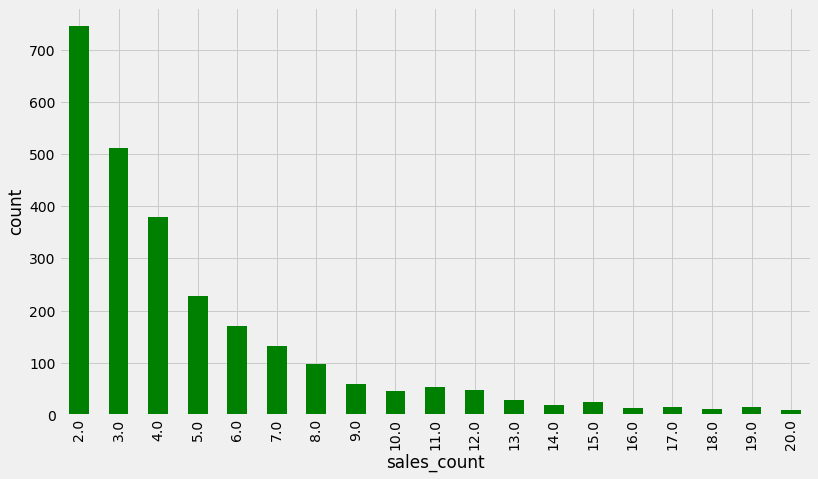

In [46]:
summary_df = summary_df.loc[summary_df['invoicedate_purchase_duration'] > 0]

ax = summary_df.groupby('sales_count').count()['sales_avg'][:20].plot(kind='bar', color='green',figsize=(12,7), grid=True)

ax.set_ylabel('count')

plt.show()

* Creating a distribution for the average times betweein sales

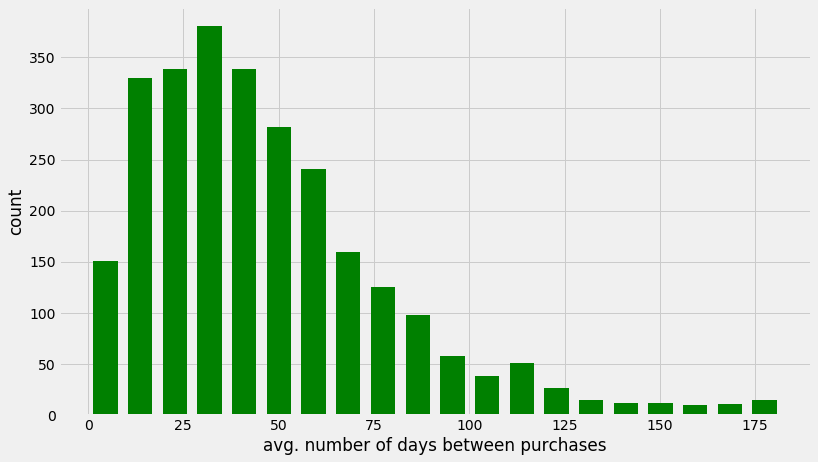

In [47]:
ax = summary_df['invoicedate_purchase_frequency'].hist(bins=20, color='green', rwidth=0.7, figsize=(12,7))

ax.set_xlabel('avg. number of days between purchases')
ax.set_ylabel('count')

plt.show()

###  Customer Lifetime Value Prediction - 3 months


* Creating summary statistics for customer sales in 3 month intervals

In [48]:
orders_df.head()

Sales         InvoiceDate
CustomerID InvoiceNo                              
12346.0    541431     77183.60 2011-01-18 10:01:00
12347.0    537626       711.79 2010-12-07 14:57:00
           542237       475.39 2011-01-26 14:30:00
           549222       636.25 2011-04-07 10:43:00
           556201       382.52 2011-06-09 13:01:00

In [49]:
clv_freq = '3M'

# Groupby customer ID now, and group all invoices for 3 month cycles.
# Aggregate on sum, mean and counts
data_df = orders_df.reset_index().groupby(['CustomerID', pd.Grouper(key='InvoiceDate', freq=clv_freq)]).agg({
    'Sales': [sum, groupby_mean, groupby_count],})

data_df.columns = ['_'.join(col).lower() for col in data_df.columns]
data_df = data_df.reset_index()
data_df.head()

,CustomerID,InvoiceDate,sales_sum,sales_avg,sales_count
0,12346.0,2011-03-31,77183.60,77183.600,1.0
1,12347.0,2010-12-31,711.79,711.790,1.0
2,12347.0,2011-03-31,475.39,475.390,1.0
3,12347.0,2011-06-30,1018.77,509.385,2.0
4,12347.0,2011-09-30,584.91,584.910,1.0


In [50]:
# Adding Recency 'M'

# Get the M

date_month_map = {str(x)[:10]: 'M_%s' % (i+1) for i, x in enumerate(sorted(data_df.reset_index()['InvoiceDate'].unique(), reverse=True))}

# Creating our M Column

data_df['M'] = data_df['InvoiceDate'].apply(lambda x: date_month_map[str(x)[:10]])

data_df.head()

,CustomerID,InvoiceDate,sales_sum,sales_avg,sales_count,M
0,12346.0,2011-03-31,77183.60,77183.600,1.0,M_4
1,12347.0,2010-12-31,711.79,711.790,1.0,M_5
2,12347.0,2011-03-31,475.39,475.390,1.0,M_4
3,12347.0,2011-06-30,1018.77,509.385,2.0,M_3
4,12347.0,2011-09-30,584.91,584.910,1.0,M_2


In [51]:
data_df['M'].unique()

array(['M_4', 'M_5', 'M_3', 'M_2', 'M_1'], dtype=object)

### Creating a dataframe of recency of customers from their last transaction

In [52]:
max_date = max(df['InvoiceDate'])

In [53]:
df['Diff'] = max_date - df['InvoiceDate']

In [54]:
# Compute last transaction date to get the recency of customers

recency_df = df.groupby('CustomerID')['Diff'].min()
recency_df = recency_df.reset_index()

In [55]:
recency_df.head(7)

,CustomerID,Diff
0,12346.0,316 days 07:36:00
1,12347.0,30 days 05:12:00
2,12348.0,66 days 04:24:00
3,12349.0,9 days 07:46:00
4,12350.0,301 days 01:36:00
5,12352.0,27 days 03:00:00
6,12353.0,194 days 23:50:00


## RFM


* R(ecency): how recently did customer purchase?


* F(rquency): how often do customer purchase?


* M(onetary Value): how much do they spend (each time on average)?

## Dataframes

* Creating the features dataframe


* Creating the response dataframe


* Creating a sample set by merging response and features dataframes

In [56]:
features_df = pd.pivot_table(data_df.loc[data_df['M'] != 'M_1'], values=['sales_sum', 'sales_avg', 'sales_count'], columns='M', index='CustomerID')

features_df.columns = ['_'.join(col) for col in features_df.columns]

features_df.head()

,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5
CustomerID,,,,,,,,,,,,
12346.0,NaN,NaN,77183.600,NaN,NaN,NaN,1.0,NaN,NaN,NaN,77183.60,NaN
12347.0,584.91,509.385,475.390,711.79,1.0,2.0,1.0,1.0,584.91,1018.77,475.39,711.79
12348.0,310.00,367.000,227.440,892.80,1.0,1.0,1.0,1.0,310.00,367.00,227.44,892.80
12350.0,NaN,NaN,334.400,NaN,NaN,NaN,1.0,NaN,NaN,NaN,334.40,NaN
12352.0,316.25,NaN,312.362,NaN,2.0,NaN,5.0,NaN,632.50,NaN,1561.81,NaN


In [57]:
response_df = data_df.loc[data_df['M'] == 'M_1', ['CustomerID', 'sales_sum']]

response_df.columns = ['CustomerID', 'CLV_'+clv_freq]

In [58]:
response_df.head()

,CustomerID,CLV_3M
5,12347.0,1294.32
10,12349.0,1757.55
14,12352.0,311.73
20,12356.0,58.35
21,12357.0,6207.67


In [59]:
sample_set_df = features_df.merge(
    response_df, 
    left_index=True, 
    right_on='CustomerID',
    how='left')

sample_set_df = sample_set_df.fillna(0)

In [60]:
sample_set_df.head()

,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5,CustomerID,CLV_3M
9218,0.00,0.000,77183.600,0.00,0.0,0.0,1.0,0.0,0.00,0.00,77183.60,0.00,12346.0,0.00
5,584.91,509.385,475.390,711.79,1.0,2.0,1.0,1.0,584.91,1018.77,475.39,711.79,12347.0,1294.32
9218,310.00,367.000,227.440,892.80,1.0,1.0,1.0,1.0,310.00,367.00,227.44,892.80,12348.0,0.00
9218,0.00,0.000,334.400,0.00,0.0,0.0,1.0,0.0,0.00,0.00,334.40,0.00,12350.0,0.00
14,316.25,0.000,312.362,0.00,2.0,0.0,5.0,0.0,632.50,0.00,1561.81,0.00,12352.0,311.73


## Model Implementation


* Linear Regression

In [61]:
# Target Variable
target_var = 'CLV_'+clv_freq

# Our Features
all_features = [x for x in sample_set_df.columns if x not in ['CustomerID', target_var]]

x_train, x_test, y_train, y_test = train_test_split(sample_set_df[all_features], sample_set_df[target_var], test_size=0.3)

reg_fit = LinearRegression()
reg_fit.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

* Getting the y intercept

In [62]:
reg_fit.intercept_

70.68062807704257

* Getting the coefficents

In [63]:
reg_fit.coef_

array([  0.3246405 ,  -0.56336989,  -0.16487254,  -0.89925256,
        75.86188344, -79.56312027, -71.71032642, 125.62765985,
         0.13500304,   0.65679677,   0.18910048,   0.82809713])

In [64]:
# Show them here per feature
coef = pd.DataFrame(list(zip(all_features, reg_fit.coef_)))
coef.columns = ['feature', 'coef']

In [65]:
coef

,feature,coef
0,sales_avg_M_2,0.324640
1,sales_avg_M_3,-0.563370
2,sales_avg_M_4,-0.164873
3,sales_avg_M_5,-0.899253
4,sales_count_M_2,75.861883
5,sales_count_M_3,-79.563120
6,sales_count_M_4,-71.710326
7,sales_count_M_5,125.627660
8,sales_sum_M_2,0.135003
9,sales_sum_M_3,0.656797


In [66]:
train_preds = reg_fit.predict(x_train)
test_preds = reg_fit.predict(x_test)

In [67]:
print(r2_score(y_true=y_train, y_pred=train_preds))
print(median_absolute_error(y_true=y_train, y_pred=train_preds))

0.8587513997962658
198.02548386953424


* Comparing R-Squared Performance on Training and Test Datasets


In [68]:
print('In-Sample R-Squared: %0.4f' % r2_score(y_true = y_train, y_pred = train_preds))
print('Out-of-Sample R-Squared: %0.4f' % r2_score(y_true = y_test, y_pred = test_preds))

In-Sample R-Squared: 0.8588
Out-of-Sample R-Squared: 0.0660


* Comparing MSE on Training and Test Datasets


In [69]:
print('In-Sample MSE: %0.4f' % median_absolute_error(y_true = y_train, y_pred = train_preds))
print('Out-of-Sample MSE: %0.4f' % median_absolute_error(y_true = y_test, y_pred = test_preds))

In-Sample MSE: 198.0255
Out-of-Sample MSE: 208.5760


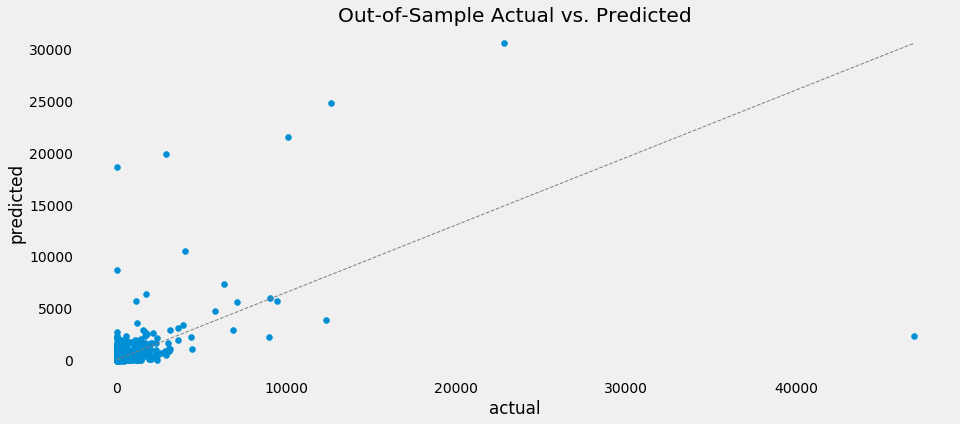

In [70]:
plt.scatter(y_test, test_preds)
plt.plot([0, max(y_test)], [0, max(test_preds)], color='gray', lw=1, linestyle='--')

plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('Out-of-Sample Actual vs. Predicted')
plt.grid()

plt.show()